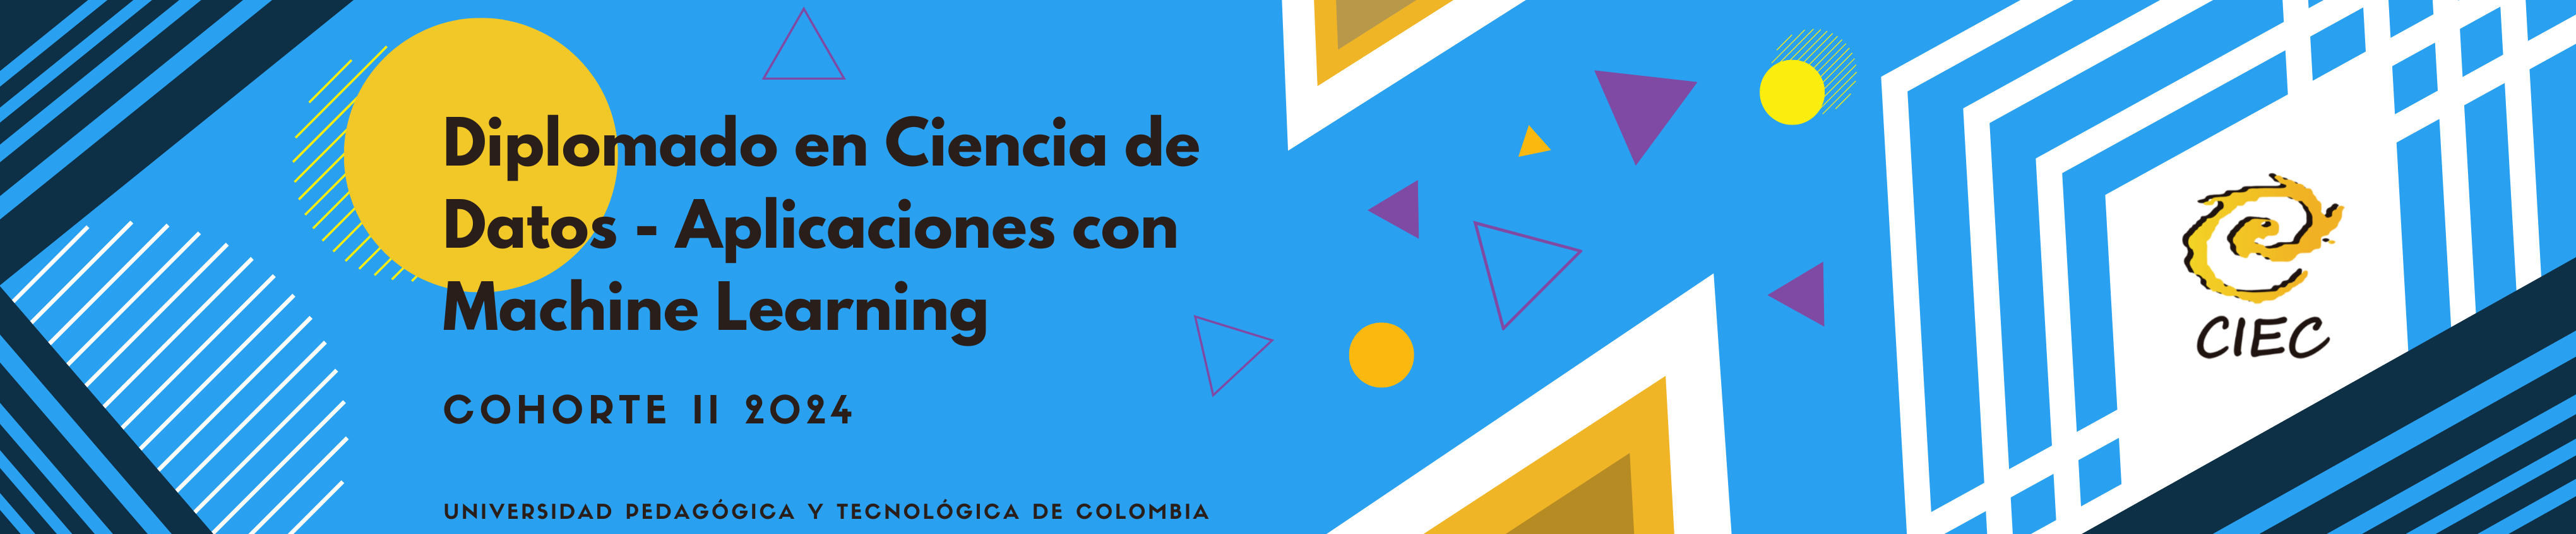

<h1 style="color: #FECB05; text-align: center;"> Incrustación de vecinos estocásticos distribuidos t (t-SNE) </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Funcionamiento del t-SNE</span>](#tsne-working)
- [<span style="color: #005C99;">Ejemplo: visualización de dígitos</span>](#viz-digits)
- [<span style="color: #005C99;">Ejemplo: Diferentes valores de perplejidad</span>](#perplexity)
- [<span style="color: #005C99;">Consideraciones</span>](#considerations)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h2 style="color: #007ACC;"> Introducción </h2>

t-SNE, abreviatura de t-Distributed Stochastic Neighbor Embedding, es una técnica de reducción de dimensionalidad particularmente útil para la visualización de datos de alta dimensión. Fue desarrollada por Laurens van der Maaten y Geoffrey Hinton en 2008. A diferencia de métodos lineales como el Análisis de Componentes Principales, t-SNE es una técnica no lineal que se especializa en preservar las relaciones locales entre puntos de datos, lo que la hace ideal para identificar y visualizar estructuras de datos complejas como agrupaciones (clústers). El t-SNE se basa principalmente en los siguientes fundamentos:

- t-SNE comienza convirtiendo las distancias entre puntos de datos en el espacio original de alta dimensión en distribuciones de probabilidad. La idea es que puntos cercanos en el espacio original tengan una alta probabilidad de ser vecinos.

- Para cada punto en el espacio de alta dimensión, se calcula una distribución de probabilidad gaussiana centrada en ese punto. La varianza de esta distribución se ajusta de manera que se mantenga una distribución de entropía fija (perplejidad).

- En el espacio de baja dimensión (generalmente 2D o 3D para visualización), t-SNE trata de encontrar una distribución de puntos que refleje las similitudes en el espacio original. Aquí, las distancias entre puntos se convierten en distribuciones de probabilidad utilizando la distribución t de Student con un grado de libertad, lo que da lugar a colas más largas y ayuda a prevenir el problema de la “congestión” de puntos.

- t-SNE minimiza la divergencia KL entre las distribuciones de probabilidad en el espacio de alta dimensión y el espacio de baja dimensión. Esta minimización se lleva a cabo utilizando un método de gradiente descendente.

---

<h2 id = "tsne-working" style="color: #007ACC;"> Funcionamiento del t-SNE </h2>

Supongamos una matriz de datos de entrada $\mathbf{X}$ de $n$ observaciones y $m$ columnas. Para cada par de puntos en alta dimensión, calculamos la probabilidad condicional $p_{i \vert j}$ que mide la similitud entre los puntos $i$ y $j$ utilizando una distribución gaussiana:

$$p_{i \vert j} = \frac{exp\left( \vert \vert x_{i} - x_{i} \vert \vert ^{2} /2 \sigma_{i}^{2}\right)}{\sum_{k \neq i} exp \left( - \vert \vert x_{i} - x_{k} \vert \vert ^{2} /2 \sigma_{i}^{2} \right)}$$

dónde $\sigma_{i}^{2}$ es la varianza de la distribución gaussiana centrada en el punto $i$. En dónde ajustamos $\sigma_{i}^{2}$ para obtener un valor específico de perplejidad:

$$perplejidad = 2^{- \sum_{j} p_{j \vert i} log(p_{j \vert i})}$$

Este valor corresponde a un hiperparámetro del modelo. La perplejidad es un parámetro fundamental en el algoritmo t-SNE que controla la densidad efectiva de los vecinos en el espacio de alta dimensión. Conceptualmente, la perplejidad se puede entender como una medida del número de vecinos que influyen en la posición de cada punto en el espacio reducido. Matemáticamente, la perplejidad se define en términos de la entropía de las distribuciones de probabilidad y puede interpretarse como una escala sujeta a la densidad de los datos. Un valor bajo de perplejidad da como resultado que el modelo considere solo los vecinos más cercanos, mientras que un valor alto de perplejidad permite que un mayor número de vecinos influya en la estructura local de los datos. Ajustar la perplejidad adecuadamente es crucial para obtener una representación de baja dimensión que preserve las relaciones locales y globales en el conjunto de datos.

Uno de los inconvenientes con la distribución de probabilidad de la similitud entre $i$ y $j$ es que $p_{i \vert j} \neq p_{j \vert i}$, dado que ambas provienen de distribuciones diferentes. Para solventar este detalle, definimos la probabilidad simétrica

$$p_{ij} = p_{ji} = \frac{p_{i \vert j} + p_{j \vert i}}{2n}$$

Las contrapartes, $y_{i}$ y $y_{j}$, que corresponden a la representación de $x_{i}$ y de $x_{j}$, respectivamente. Siguen una distribución de probabilidad dada por 

$$q_{i \vert j} = \frac{\left ( 1 + \vert \vert y_{i} - y_{j} \vert \vert ^{2} \right) ^{-1}}{\sum_{k \neq l} \left( 1 + \vert \vert y_{k} - y_{l} \vert \vert ^{2} \right)^{-1}}$$

<h3 id="subsection1-1" style="color: #003366;">Función de pérdida</h3>

El problema de que el modelo intenta resolver es el de encontrar los puntos $\mathbf{y} = \{y_{1}, y_{2}, ..., y_{m}\}$ tal que se se minimice la divergencia de Kullback–Leibler:

$$KL(P \vert \vert Q) = \sum_{i} \sum_{j} p_{i \vert j} log \left(\frac{p_{i \vert j}}{q_{i \vert j}} \right)$$

Esta función es minimizada por medio del algoritmo de gradiente descendiente. Puede demostrarse que la primera derivada de esta función viene dada por:

$$ \frac{\partial KL}{\partial y_{i}} = -4 \sum_{j} \left(p_{i \vert j} - q_{i \vert j} \right) \left(y_{i} - y_{j} \right) \left(1 + \vert \vert y_{i} - y_{j} \vert \vert^{2} \right)^{-1}$$

<h3 id="subsection1-1" style="color: #003366;">Pseudo-algoritmo</h3>

- Entrada: Matriz de datos $\mathbf{X}$, perplejidad $P$, número de iteraciones, $\text{max_iter}$, tasa de aprendizaje $\eta$
- Salida: Coordenadas $\mathbf{Y}$ en baja dimensión

1. Inicialización:

a. Para cada punto $i$ en $\mathbf{X}$:

- Inicializar $\sigma_{i}^{2}$
- Calcular distancias euclidianas $d_{ij}$ para todos los puntos $j$

b. Para cada punto i:
Mientras (perplejidad de $P_{i}$ no esté cerca de $P$):
- Calcular $p_{j|i} = exp(-d_{ij}^2 / 2\sigma_i^2) / \sum_{k \neq i} exp(-d_{ik}^2 / 2\sigma_i^2)$
- Ajustar $\sigma_{i}^{2}$

c. Calcular las probabilidades simétricas $p_{ij}$:

- $p_{ij} = (p_{j|i} + p_{i|j}) / (2n)$

2. Inicialización de $\mathbf{Y}$:

- Inicializar $\mathbf{Y}$ aleatoriamente en baja dimensión

3. Iteración:

Para cada iteración $t$ desde 1 hasta $\text{max_iter}$:

a. Calcular distancias en baja dimensión $q_{ij}$:
         - $q_{ij} = (1 + \vert \vert y_i - y_j \vert \vert ^2)^{-1} / \sum_{k \neq l} (1 + \vert \vert y_k - y_l \vert \vert ^2)^{-1}$

b. Calcular la divergencia KL y el gradiente:

- $KL =  \sum_i \sum_j p_{ij} log(p_{ij} / q_{ij})$
- $\nabla KL = 4 \sum_j (p_{ij} - q_{ij}) (y_i - y_j) (1 + \|y_i - y_j\|^2)^{-1}$

c. Actualizar coordenadas $\mathbf{Y}$:

- $y^{t}_{i} = y^{t - 1}_{i} - \eta * \nabla KL$

4. Resultado:
   - Devolver las coordenadas $\mathbf{Y}$ en baja dimensión

---

<h2 id = "viz-digits"style="color: #007ACC;"> Ejemplo: visualización de dígitos </h2>

In [1]:
# librerías
from sklearn.datasets import load_digits
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd

# datos
digits = load_digits()

In [2]:
print(digits.data.shape)

(1797, 64)


In [3]:
X = digits.data
df = pd.DataFrame(X)

df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
def plot_random_images(N, data, target, images):
    # Ensure N is not greater than the number of available images
    N = min(N, len(images))
    
    # Randomly select N indices
    indices = np.random.choice(len(images), N, replace=False)
    
    # Determine grid size (e.g., for N images, the grid will be approximately sqrt(N) x sqrt(N))
    grid_size = int(np.ceil(np.sqrt(N)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten()
    
    for i in range(grid_size * grid_size):
        if i < N:
            # Get the image and label
            img = images[indices[i]]
            label = target[indices[i]]
            
            # Plot the image
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

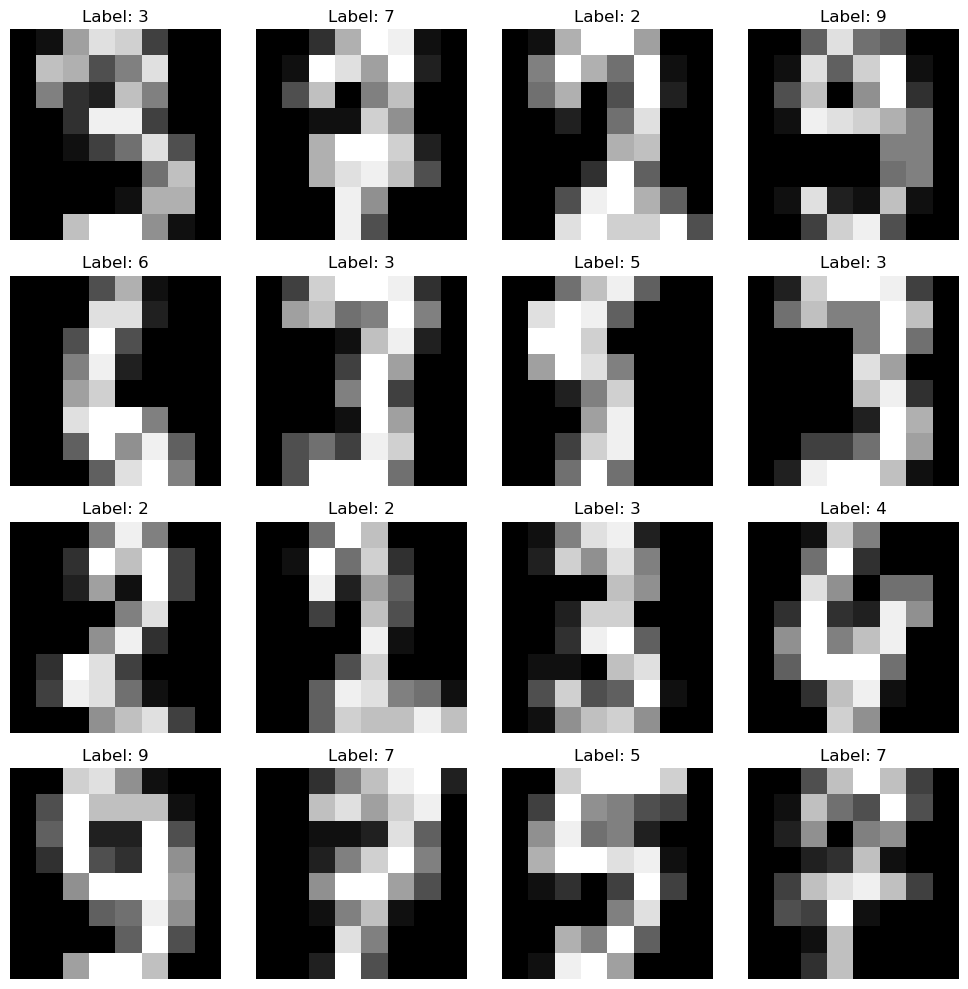

In [5]:
images = digits.images
target = digits.target

# Example usage
plot_random_images(16, X, target, images)

In [6]:
# embedding
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='pca', perplexity=30).fit_transform(df)
#plot
data_plot = pd.DataFrame(X_embedded)
data_plot.columns = ['x','y']
data_plot['digit'] = digits.target

In [7]:
data_plot

,x,y,digit
0,-2.936592,54.235882,0
1,10.227590,-11.685332,1
2,-13.804469,-18.731495,2
3,-35.819412,6.474601,3
4,40.521160,-7.600551,4
...,...,...,...
1792,-23.348145,17.394634,9
1793,3.598032,49.444000,0
1794,-5.593919,-10.779225,8
1795,-20.753029,15.130617,9


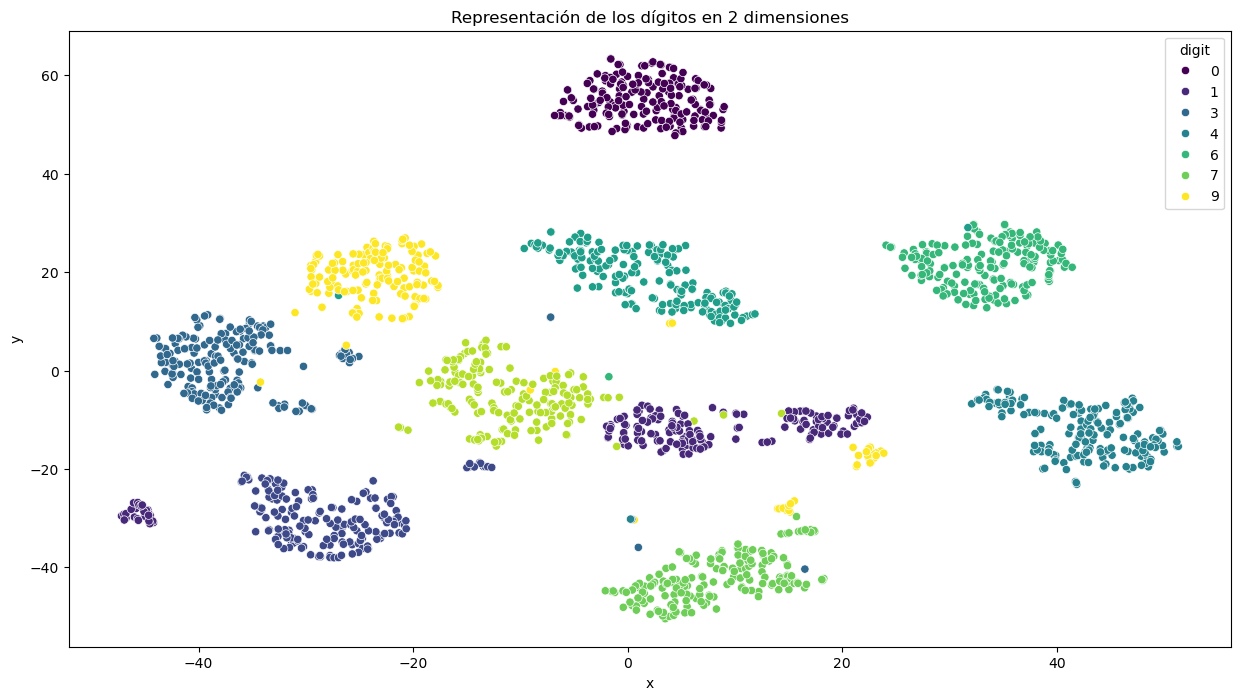

In [8]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data_plot, x='x', y='y', hue='digit', 
                palette='viridis').set(title='Representación de los dígitos en 2 dimensiones')
plt.show()

---

<h2 id = 'perplexity' style="color: #007ACC;"> Ejemplo: Diferentes valores de perplejidad </h2>

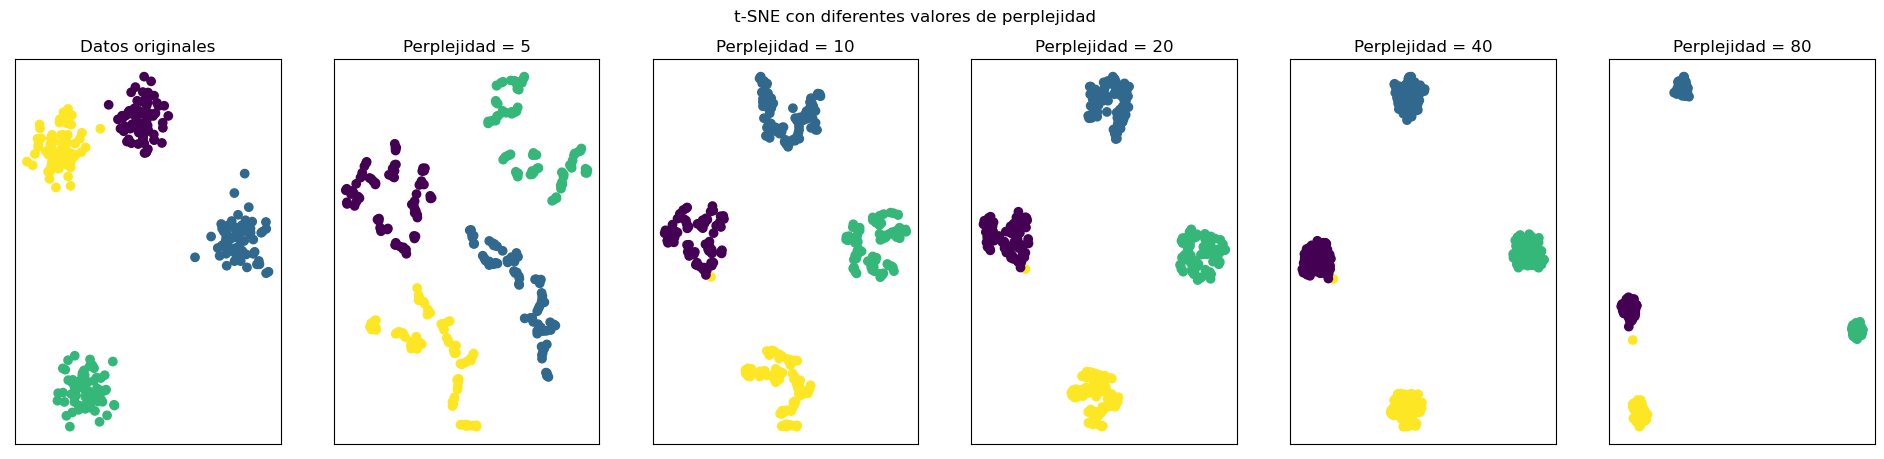

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Define perplexity values to test
perplexities = [5, 10, 20, 40, 80]

# Initialize a plot
fig, axes = plt.subplots(1, len(perplexities) + 1, figsize=(24, 5))
fig.suptitle('t-SNE con diferentes valores de perplejidad')

# Plot the original data
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axes[0].set_title('Datos originales')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Apply t-SNE for each perplexity value and plot the results
for ax, perplexity in zip(axes[1:], perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    ax.set_title(f'Perplejidad = {perplexity}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

---

<h2 id = "considerations" style="color: #007ACC;">Consideraciones</h2>

**Ventajas de t-SNE**

- t-SNE es muy efectivo para preservar las relaciones locales, lo que facilita la identificación de clústers y patrones en los datos.
- Produce visualizaciones claras y fácilmente interpretables, especialmente cuando se trabaja con datos de alta dimensionalidad.

**Desventajas**

- t-SNE puede ser computacionalmente costoso y no escala bien con conjuntos de datos extremadamente grandes.
- Los resultados pueden ser sensibles a los parámetros, como la perplejidad y la tasa de aprendizaje, lo que requiere ajuste fino.
- t-SNE tiende a enfocar la preservación de las relaciones locales y puede no capturar bien la estructura global de los datos.


---

<h2 id="reference" style="color: #007ACC;">Referencias</h2>

- Artículo original con la propuesta del modelo t-SNE: https://www.researchgate.net/publication/228339739_Viualizing_data_using_t-SNE

- Artículo de Medium con explicaciones detalladas sobre t-SNE: https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea

- Artículo de Towards Data Science con explicaciones detalladas sobre t-SNE: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

- Repositorio de la Universidad Nacional con explicaciones detalladas sobre t-SNE: https://github.com/AprendizajeProfundo/diplomado-ciencia-de-datos/blob/main/Reduccion-dimension-visualizacion/Cuadernos/rd_0080_tsne.ipynb

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Juan Felipe Contreras Alcívar

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---